<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/tm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Jupyter Notebook for chapters 6 of  
# the Computational Models and Formal Languages Book

<a href="https://samyzaf.com/afl.pdf">
<img src="https://samyzaf.com/afl/afl1.jpg" alt="CMFL book cover"/>
</a>

* The purpose of this notebook is to allow students and readers of
  the CMFL book to conveniently simulate finite automata on a Google Colab environment
  (without having to install anything on their computer or device).
* For that purpose we've built a simple Python wrapper
  package **pyfasim**, around the excellent automata-lib package
  (thanks to its author Caleb Evans <caleb@calebevans.me>,
  see also: https://github.com/caleb531/automata).
* It can be used to define easily standard examples of finite automata, and then run experiments,
  check statements, and draw diagrams.
* The simplified wrapper is intended to make it accessible to first or second year college students
  without Python knowledge or even with no programming experience.
* We'll be glad to get feedback and code for solving exercises from the book.

## Installing the **pyfasim** package
* Depending on the virtual machine allocated to you
  (or the local machine you are runnig this Jupyter notebook),
  you may need to install the latest python3-dev/graphviz lib.

* In such case you will have to run the next line of code.

In [1]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 18 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,670 kB o

* The next line must be run in order to install
  the **pyfasim** package on the
  machine on which the notebook runs.
* The second line is required to import the package.

In [2]:
%pip install -q https://samyzaf.com/pyfasim.zip
from pyfasim import *

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 18.1 MB/s eta 0:00:00


## Defining a Deterministic Turing Machine (DTM)
* The **DTM** command creates a new Deterministic Finite Autamata
  by specifying its name, states, input_symbols, transitions,
  initial_state, and final_states
* The following example is a typical.
* You may copy it and solve some of the exercises in the book.

In [3]:
description= """
name: dtm1
states: q0 q1 q2 q3 q4
input_symbols: 0 1
tape_symbols: 0 1 x y .
transitions:
    q0:
        0: q1 x R
        y: q3 y R
    q1:
        0: q1 0 R
        1: q2 y L
        y: q1 y R
    q2:
        0: q2 0 L
        x: q0 x R
        y: q2 y L
    q3:
        y: q3 y R
        .: q4 . R
initial_state: q0
blank_symbol: .
final_states: q4
"""

dtm1 = DTM(description)

dtm1


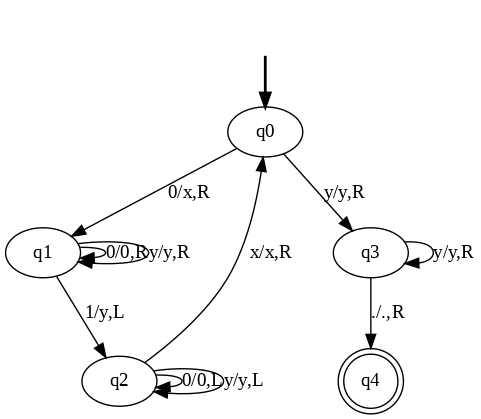

In [4]:
print(dtm1.name)
dtm1.show_diagram(dpi=100)

In [5]:
dtm1.accepts_input('1100')

False

In [6]:
dtm1.accepts_input('000111')

True

In [7]:
dtm1.compseq('000111')

[('q0', '000111', 0),
 ('q1', 'x00111', 1),
 ('q1', 'x00111', 2),
 ('q1', 'x00111', 3),
 ('q2', 'x00y11', 2),
 ('q2', 'x00y11', 1),
 ('q2', 'x00y11', 0),
 ('q0', 'x00y11', 1),
 ('q1', 'xx0y11', 2),
 ('q1', 'xx0y11', 3),
 ('q1', 'xx0y11', 4),
 ('q2', 'xx0yy1', 3),
 ('q2', 'xx0yy1', 2),
 ('q2', 'xx0yy1', 1),
 ('q0', 'xx0yy1', 2),
 ('q1', 'xxxyy1', 3),
 ('q1', 'xxxyy1', 4),
 ('q1', 'xxxyy1', 5),
 ('q2', 'xxxyyy', 4),
 ('q2', 'xxxyyy', 3),
 ('q2', 'xxxyyy', 2),
 ('q0', 'xxxyyy', 3),
 ('q3', 'xxxyyy', 4),
 ('q3', 'xxxyyy', 5),
 ('q3', 'xxxyyy.', 6),
 ('q4', 'xxxyyy..', 7)]

In [18]:
cit = dtm1.read_input_stepwise('000111')
for c in cit:
    print(c)

TMConfiguration('q0', TMTape('000111', '.', 0))
TMConfiguration('q1', TMTape('x00111', '.', 1))
TMConfiguration('q1', TMTape('x00111', '.', 2))
TMConfiguration('q1', TMTape('x00111', '.', 3))
TMConfiguration('q2', TMTape('x00y11', '.', 2))
TMConfiguration('q2', TMTape('x00y11', '.', 1))
TMConfiguration('q2', TMTape('x00y11', '.', 0))
TMConfiguration('q0', TMTape('x00y11', '.', 1))
TMConfiguration('q1', TMTape('xx0y11', '.', 2))
TMConfiguration('q1', TMTape('xx0y11', '.', 3))
TMConfiguration('q1', TMTape('xx0y11', '.', 4))
TMConfiguration('q2', TMTape('xx0yy1', '.', 3))
TMConfiguration('q2', TMTape('xx0yy1', '.', 2))
TMConfiguration('q2', TMTape('xx0yy1', '.', 1))
TMConfiguration('q0', TMTape('xx0yy1', '.', 2))
TMConfiguration('q1', TMTape('xxxyy1', '.', 3))
TMConfiguration('q1', TMTape('xxxyy1', '.', 4))
TMConfiguration('q1', TMTape('xxxyy1', '.', 5))
TMConfiguration('q2', TMTape('xxxyyy', '.', 4))
TMConfiguration('q2', TMTape('xxxyyy', '.', 3))
TMConfiguration('q2', TMTape('xxxyyy', '

In [8]:
description= """
name: dtm2
states: s q1 q2 h
input_symbols: a b c
tape_symbols: a b c B
transitions:
    s:
        a: q1 a R
        b: q1 a R
        c: q1 a R
    q1:
        a: q2 b L
        b: q2 a L
    q2:
        a: q1 b R
        b: q1 a R
        B: h a L
initial_state: s
blank_symbol: B
final_states: h
"""

dtm2 = DTM(description)

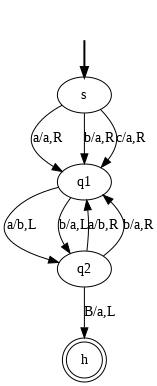

In [9]:
dtm2.show_diagram(dpi=72)

In [21]:
from itertools import product
def scan_input(tm, n=2, limit=100):
    symbols = tm.input_symbols
    it = product(symbols, repeat=n)
    ctr=0
    while True:
        ctr += 1
        if ctr>limit:
            break
        try:
            w = ''.join(next(it))
        except StopIteration:
            break
        print('\n\n==== (%d) w=%s ====' % (ctr,w))
        tm.compseq(w)


In [22]:
scan_input(dtm2, n=3)



==== (1) w=aaa ====


==== (2) w=aab ====


==== (3) w=aac ====


==== (4) w=aba ====


==== (5) w=abb ====


==== (6) w=abc ====


==== (7) w=aca ====
<stall>


==== (8) w=acb ====
<stall>


==== (9) w=acc ====
<stall>


==== (10) w=baa ====


==== (11) w=bab ====


==== (12) w=bac ====


==== (13) w=bba ====


==== (14) w=bbb ====


==== (15) w=bbc ====


==== (16) w=bca ====
<stall>


==== (17) w=bcb ====
<stall>


==== (18) w=bcc ====
<stall>


==== (19) w=caa ====


==== (20) w=cab ====


==== (21) w=cac ====


==== (22) w=cba ====


==== (23) w=cbb ====


==== (24) w=cbc ====


==== (25) w=cca ====
<stall>


==== (26) w=ccb ====
<stall>


==== (27) w=ccc ====
<stall>


In [10]:
# DTM which matches all strings contaning at least two zeros and two ones
description= """
name: dtm3
states: s q0 q1 q00 q11 q01 q001 q011 h
input_symbols: 0 1
tape_symbols: 0 1 B
transitions:
    s:
        0: q0 0 R
        1: q1 1 R

    q0:
        0: q00 0 R
        1: q01 1 R

    q1:
        0: q01 0 R
        1: q11 1 R

    q00:
        0: q00 0 R
        1: q001 1 R

    q01:
        0: q001 0 R
        1: q011 1 R

    q11:
        0: q011 0 R
        1: q11 1 R

    q001:
        0: q001 0 R
        1: h 1 R

    q011:
        0: h 0 R
        1: q011 1 R

initial_state: s
blank_symbol: B
final_states: h
"""

dtm3 = DTM(description)

name: dtm3
states: q011 q00 q001 q0 h q11 q1 q01 s
input_symbols: 0 1
tape_symbols: 0 1 B
transitions:
    s:
        0:  q0 0 R
        1:  q1 1 R
    q0:
        0:  q00 0 R
        1:  q01 1 R
    q1:
        0:  q01 0 R
        1:  q11 1 R
    q00:
        0:  q00 0 R
        1:  q001 1 R
    q01:
        0:  q001 0 R
        1:  q011 1 R
    q11:
        0:  q011 0 R
        1:  q11 1 R
    q001:
        0:  q001 0 R
        1:  h 1 R
    q011:
        0:  h 0 R
        1:  q011 1 R
initial_state: s
blank_symbol: B
final_states: h



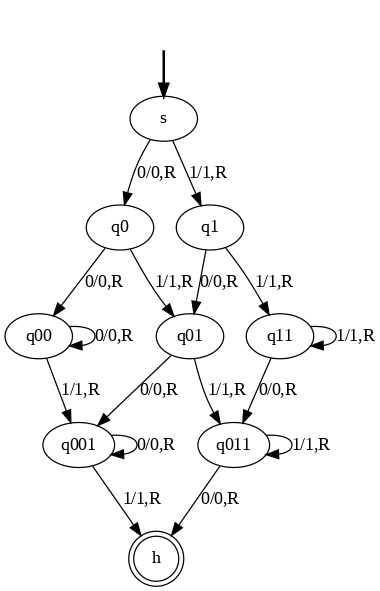

In [11]:
des = dtm3.description()
print(des)
dtm3.show_diagram(dpi=90)

In [12]:
dtm4 = DTM("""
name: dtm4
states: s qy0 qy1 qc qd qd0 qd1 qe q1 q2 h
input_symbols: 0 1
tape_symbols: 0 1 Y a b B
transitions:
    s:
        0: qy0 a R
        1: qy1 b R
        B: h 0 R

    # go to first blank cell and write Y separator
    qy0:
        0: qy0 0 R
        1: qy0 1 R
        B: qd0 Y R

    # go to first blank cell and write Y separator
    qy1:
        0: qy1 0 R
        1: qy1 1 R
        B: qd1 Y R

    # q side 2: machine on side 2 move left to sep symbol Y
    q2:
        0: q2 0 L
        1: q2 1 L
        B: q2 B L
        Y: qc Y L

    # q side 1: search for first 0 or 1 on side 1
    q1:
        0: q1 0 L
        1: q1 1 L
        a: qd a R
        b: qd b R

    # machined crossed to the left cell of Y
    qc:
        0: q1 0 L
        1: q1 1 L
        a: qe a R
        b: qe b R

    # q duplicate 01 symbol
    qd:
        0: qd0 a R
        1: qd1 b R

    # q duplicate 0: move right till first B and write 0
    qd0:
        0: qd0 0 R
        1: qd0 1 R
        a: qd0 a R
        b: qd0 b R
        Y: qd0 Y R
        B: q2 0 L

    # q duplicate 1: move right till first B and write 1
    qd1:
        0: qd1 0 R
        1: qd1 1 R
        a: qd1 a R
        b: qd1 b R
        Y: qd1 Y R
        B: q2 1 L

    qe:
        0: h 0 R
        1: h 1 R
        a: qe 0 L
        b: qe 1 L
        B: h B R
        Y: qe 0 L

initial_state: s
blank_symbol: B
final_states: h
""")

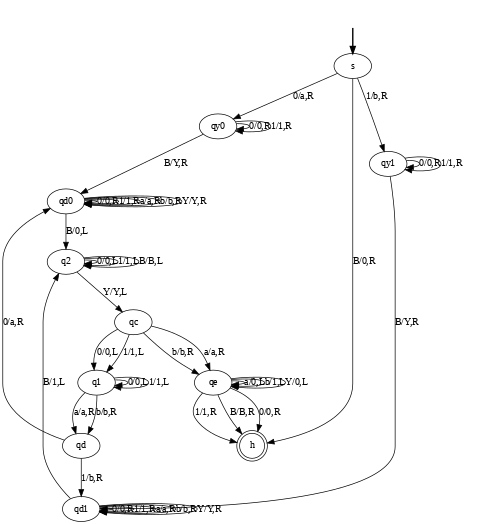

In [13]:
dtm4.show_diagram(dpi=50)

In [14]:
dtm5 = DTM("""
name: dtm5
states: s q1 q2 qc qz qr qs qe qo h
input_symbols: 0
tape_symbols: 0 a x B

transitions:
    # write a move right to state q1
    s:
        0: q1 a R

    # detect a zero
    q1:
        0: q2 0 R
        x: q1 x R
        B: qc B L

    # replace second zero with x
    q2:
        0: q1 x R
        x: q2 x R
        B: qc B L

    # check for one or more zeros
    qc:
        0: qz 0 L
        x: qc x L
        a: qc a L

    # one zero detection state
    qz:
        0: qr 0 L
        x: qz x L
        a: h a R

    # return to start of tape and check even/odd
    qr:
        0: qr 0 L
        x: qr x L
        a: qe a R

    # return to start of tape and restart algorithm
    qs:
        0: qs 0 L
        x: qs x L
        a: q1 a R

    # even number of zeroes state
    qe:
        0: qo 0 R
        a: qe a R
        x: qe x R
        B: qs B L

    # odd number of zeroes state
    qo:
        0: qe 0 R
        a: qo a R
        x: qo x R

initial_state: s
blank_symbol: B
final_states: h
""")

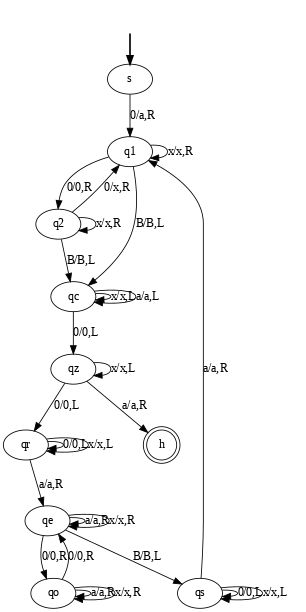

In [15]:
dtm5.show_diagram(dpi=60)

In [16]:
states = ['s', 'q1', 'q2', 'qc', 'qz', 'qr', 'qs', 'qe', 'qo']
symbols = ['0', 'B', 'a', 'x']
#table = trans_table_tex(dtm5, states,symbols)
#print(table)

In [17]:
dtm1.transition_table2()

trans,0,1,x,y,.
q0,"q1,x,R",,,"q3,y,R",
q1,"q1,0,R","q2,y,L",,"q1,y,R",
q2,"q2,0,L",,"q0,x,R","q2,y,L",
q3,,,,"q3,y,R","q4,.,R"
